# Load Package

In [1]:
%matplotlib inline
import sys

import arviz as az
import numpy as np
import pymc as pm

from arviz_dashboard import dashboard_elpd

if not sys.warnoptions:
    import warnings

    warnings.simplefilter("ignore")

Loading BokehJS ...

Loading BokehJS ...

## Test 1

### Create Models

In [2]:
dict_cmp = {}
d1 = az.load_arviz_data("centered_eight")
d2 = az.load_arviz_data("non_centered_eight")
dict_cmp["mA"] = d1
dict_cmp["mB"] = d2

### Build Dashboard

Column
    [0] Row
        [0] Select(name='Model1', options=['mA', 'mB'], value='mA')
        [1] Select(name='Model2', options=['mA', 'mB'], value='mB')
    [1] Row
        [0] Select(name='Threshold Type', options=['standard deviation'], value='standard deviation', width=200)
        [1] Column
            [0] Markdown(str)
            [1] RadioBoxGroup(inline=True, name='Information Criterion', options=['loo', 'waic'], value='loo')
    [2] FloatSlider(end=3, name='Threshold Value', start=1, value=2, width=200)
    [3] Str(str, style={'font-size': '12pt', ...})
    [4] Row
        [0] ParamFunction(function)
        [1] ParamFunction(function)
        [2] ParamFunction(function)
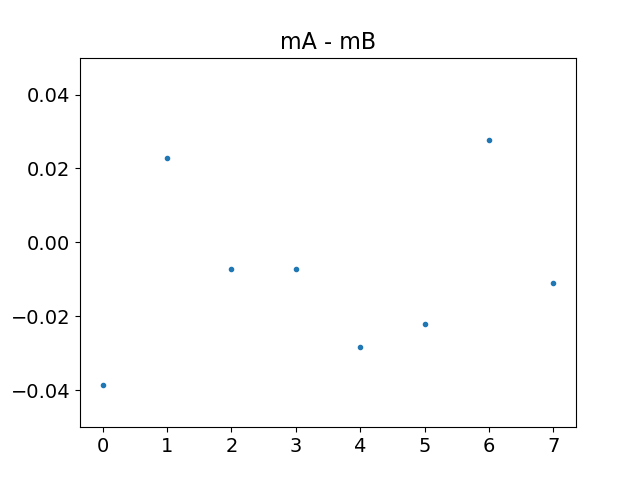

In [3]:
dashboard_elpd(dict_cmp)

## Test2

### Create Models

In [4]:
y_obs = np.random.normal(0, 1, size=100)
idatas_cmp = {}

with pm.Model() as mA:
    σ = pm.HalfNormal("σ", 1)
    y = pm.SkewNormal("y", 0, σ, observed=y_obs)
    idataA = pm.sample()
    idataA.extend(pm.sample_posterior_predictive(idataA))

with pm.Model() as mB:
    σ = pm.HalfNormal("σ", 1)
    y = pm.Normal("y", 0, σ, observed=y_obs)
    idataB = pm.sample()
    idataB.extend(pm.sample_posterior_predictive(idataB))


with pm.Model() as mC:
    μ = pm.Normal("μ", 0, 1)
    σ = pm.HalfNormal("σ", 1)
    y = pm.Normal("y", μ, σ, observed=y_obs)
    idataC = pm.sample()
    idataC.extend(pm.sample_posterior_predictive(idataC))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
Sampling: [y]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
Sampling: [y]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
Sampling: [y]


In [5]:
idatas_cmp["mA"] = idataA
idatas_cmp["mB"] = idataB
idatas_cmp["mC"] = idataC

### Build Dashboard

Column
    [0] Row
        [0] Select(name='Model1', options=['mA', 'mB', 'mC'], value='mA')
        [1] Select(name='Model2', options=['mA', 'mB', 'mC'], value='mB')
    [1] Row
        [0] Select(name='Threshold Type', options=['standard deviation'], value='standard deviation', width=200)
        [1] Column
            [0] Markdown(str)
            [1] RadioBoxGroup(inline=True, name='Information Criterion', options=['loo', 'waic'], value='loo')
    [2] FloatSlider(end=3, name='Threshold Value', start=1, value=2, width=200)
    [3] Str(str, style={'font-size': '12pt', ...})
    [4] Row
        [0] ParamFunction(function)
        [1] ParamFunction(function)
        [2] ParamFunction(function)
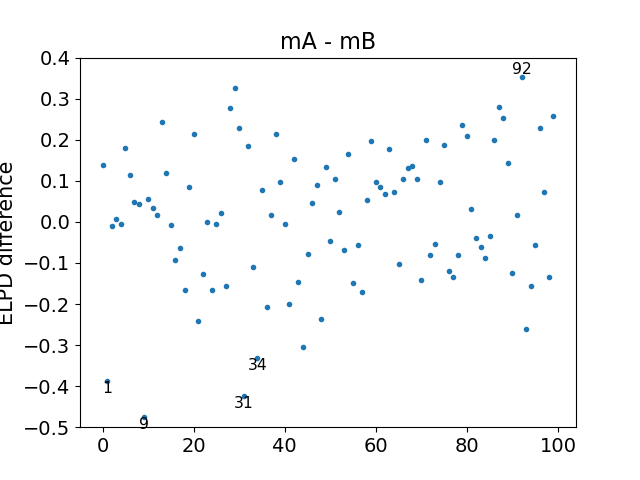

In [6]:
dashboard_elpd(idatas_cmp)